In [2]:
# =============================================================================
# CURSO: APRENDIZAJE AUTOMÁTICO EN PROCESOS INDUSTRIALES
# NOTEBOOK 2: ANÁLISIS EXPLORATORIO DE DATOS (EDA) - DATOS REALES UCI
# Dataset: Steel Plates Faults (ID: 198)
# =============================================================================

# Instalación de la librería oficial de UCI (necesario en Colab)
%pip install ucimlrepo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# 1. IMPORTACIÓN DIRECTA DESDE EL REPOSITORIO UCI
# -----------------------------------------------------------------------------
print("Accediendo al repositorio oficial de la UCI...")

try:
    # Importamos el dataset usando su ID oficial (198)
    steel_plates_faults = fetch_ucirepo(id=198)

    # Extraemos las características (X) y los objetivos (y)
    X = steel_plates_faults.data.features
    y = steel_plates_faults.data.targets

    # Combinamos en un solo DataFrame para el análisis exploratorio
    df = pd.concat([X, y], axis=1)

    print("✅ Dataset real importado con éxito.")
    print(f"Dimensiones: {df.shape[0]} muestras y {df.shape[1]} variables.\n")

except Exception as e:
    print(f"❌ Error al conectar con la API de UCI: {e}")
    print("Asegúrate de tener instalada la librería: !pip install ucimlrepo")
    # En caso de error de red, este script fallará intencionadamente para evitar simulaciones.
    raise e

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------- ----------------------- 4.5/11.0 MB 22.4 MB/s eta 0:00:01
   ----------------------------------- ---- 9.7/11.0 MB 23.2 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 21.5 MB/s  0:00:00
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
   ----------------- ---------------------- 5.2/12.3 MB 29.0 MB/s eta 0:00:01
   --------------------------------- ------ 10.2/12.3 MB 25.5 MB/s eta 0:00:01
   ---------------------------------------  12.1/12.3 MB 18.9 MB/s eta 0:00:01
   ---------------------------------------- 12.3/12.3 MB 17.9 MB/s  0:00:00
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)

   ---------------------------------------- 0/6 [pytz]
   ---------------------------------------- 0/6 [pytz]
   ---------------------------------------- 0/6 [pytz]
   ---------------------------

ERROR: Could not install packages due to an OSError: [WinError 32] El proceso no tiene acceso al archivo porque está siendo utilizado por otro proceso: 'c:\\Users\\Raul\\Documents\\Github\\-UNIR-Aprendizaje-automatico-en-procesos-industriales\\.venv\\Lib\\site-packages\\ucimlrepo\\__init__.py'
Check the permissions.



ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
# 2. EXPLORACIÓN INICIAL DE LOS DATOS REALES
# -----------------------------------------------------------------------------
# Mostramos las primeras filas para verificar la integridad
print("Primeras 5 filas del dataset:")
print(df.head())

Primeras 5 filas del dataset:
   X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0         42         50     270900     270944           267           17   
1        645        651    2538079    2538108           108           10   
2        829        835    1553913    1553931            71            8   
3        853        860     369370     369415           176           13   
4       1289       1306     498078     498335          2409           60   

   Y_Perimeter  Sum_of_Luminosity  Maximum_of_Luminosity  Length_of_Conveyer  \
0           44              24220                    108                1687   
1           30              11397                    123                1687   
2           19               7972                    125                1623   
3           45              18996                    126                1353   
4          260             246930                    126                1353   

   ...  Luminosity_Index  Sigmoi

In [ ]:
# 3. ESTADÍSTICA DESCRIPTIVA (TEMA 2.4)
# -----------------------------------------------------------------------------
# Seleccionamos variables técnicas representativas
tech_features = ['Pixels_Areas', 'X_Perimeter', 'Steel_Plate_Thickness', 'Luminosity_Index']
print("\n--- Estadísticas de Variables Técnicas ---")
print(df[tech_features].describe())


--- Estadísticas de Variables Técnicas ---
        Pixels_Areas   X_Perimeter  Steel_Plate_Thickness  Luminosity_Index
count    1941.000000   1941.000000            1941.000000       1941.000000
mean     1893.878413    111.855229              78.737764         -0.131305
std      5168.459560    301.209187              55.086032          0.148767
min         2.000000      2.000000              40.000000         -0.998900
25%        84.000000     15.000000              40.000000         -0.195000
50%       174.000000     26.000000              70.000000         -0.133000
75%       822.000000     84.000000              80.000000         -0.066600
max    152655.000000  10449.000000             300.000000          0.642100


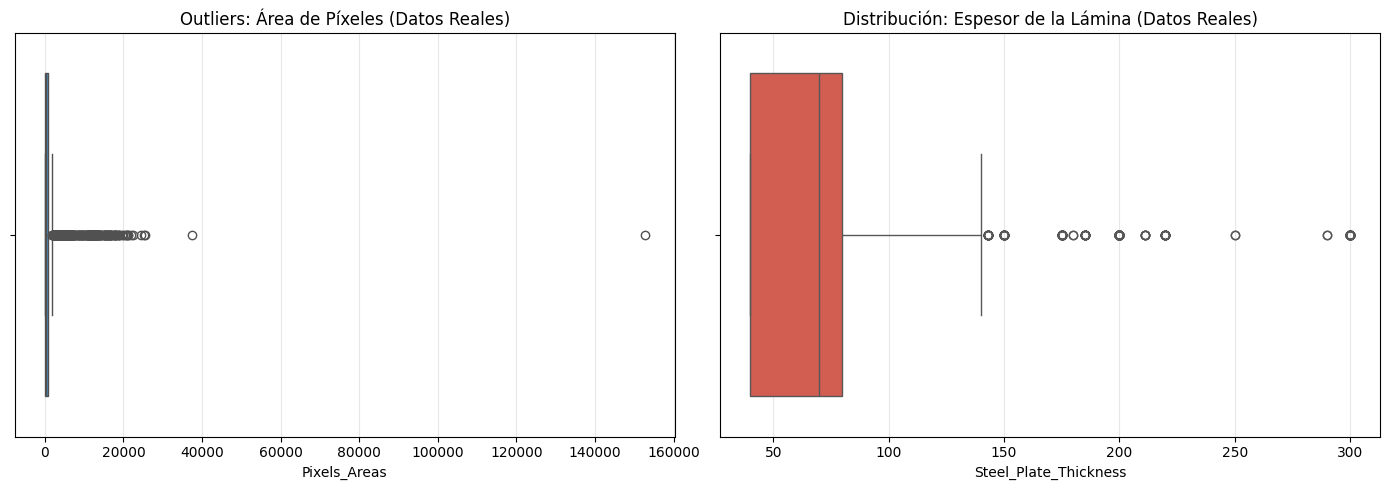

In [ ]:
# 4. DETECCIÓN DE VALORES ATÍPICOS - BOXPLOTS (TEMA 2.5)
# -----------------------------------------------------------------------------
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Pixels_Areas'], color='#3498db')
plt.title('Outliers: Área de Píxeles (Datos Reales)')
plt.grid(axis='x', alpha=0.3)

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Steel_Plate_Thickness'], color='#e74c3c')
plt.title('Distribución: Espesor de la Lámina (Datos Reales)')
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

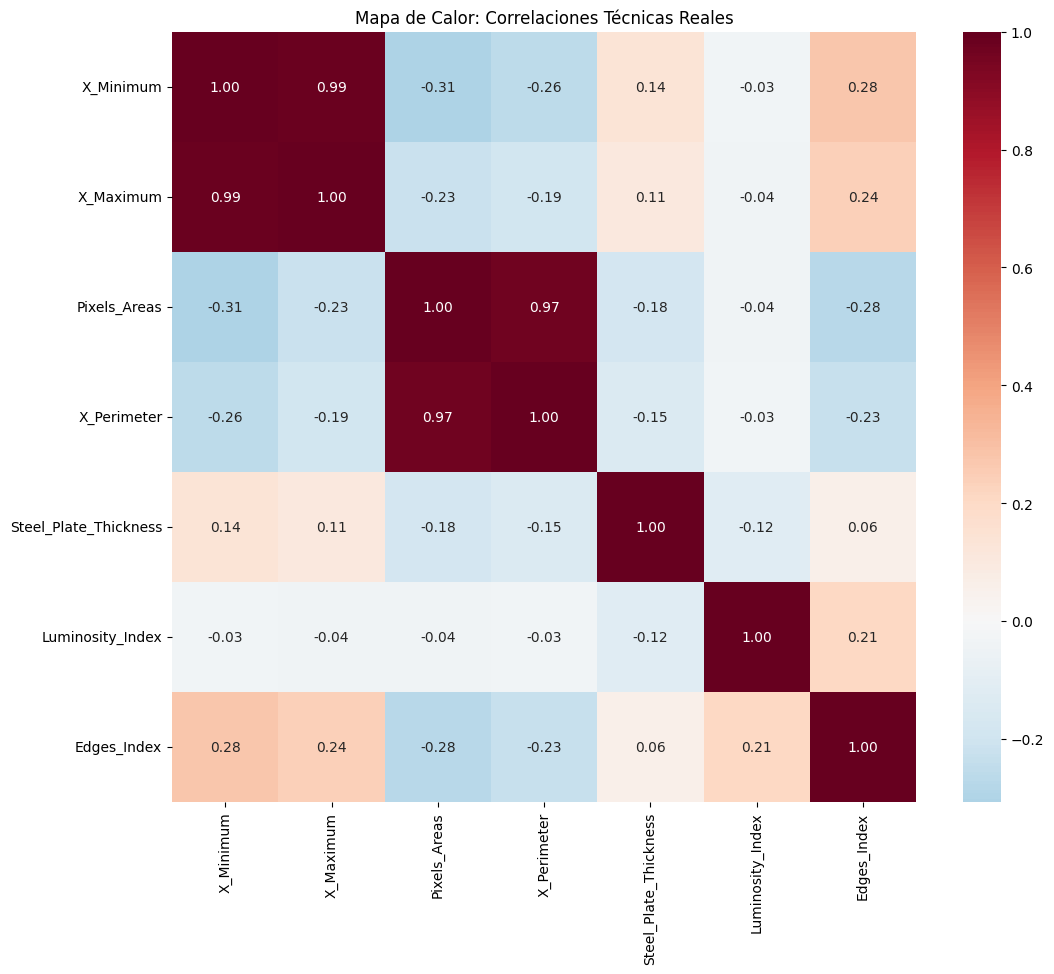

In [ ]:
# 5. MATRIZ DE CORRELACIÓN (TEMA 2.7)
# -----------------------------------------------------------------------------
plt.figure(figsize=(12, 10))
# Calculamos la correlación del subset de características físicas
subset_features = ['X_Minimum', 'X_Maximum', 'Pixels_Areas', 'X_Perimeter',
                   'Steel_Plate_Thickness', 'Luminosity_Index', 'Edges_Index']
corr = df[subset_features].corr()

sns.heatmap(corr, annot=True, cmap='RdBu_r', center=0, fmt=".2f")
plt.title('Mapa de Calor: Correlaciones Técnicas Reales')
plt.show()

/tmp/ipython-input-2612812892.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fault_counts.index, y=fault_counts.values, palette='viridis')


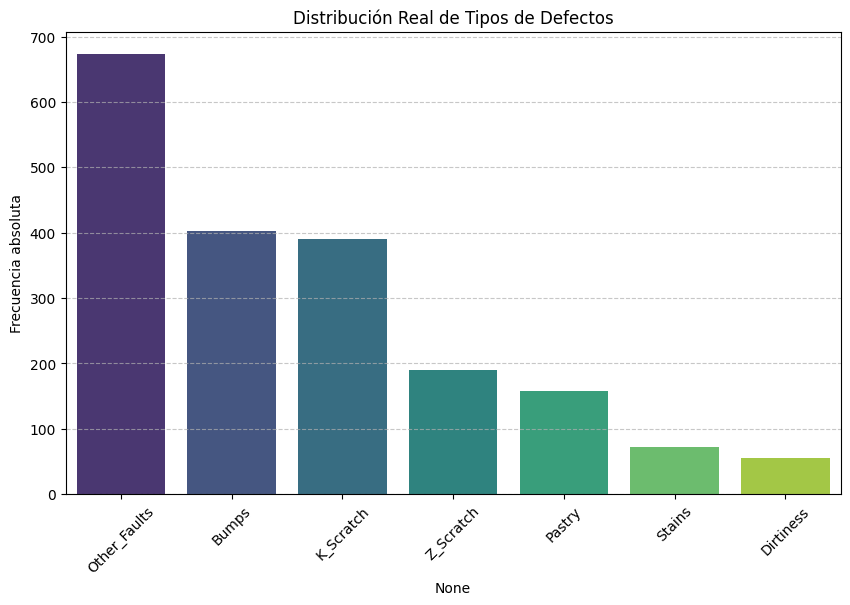


--- Conclusión del EDA con Datos Reales ---
Se han identificado 34 columnas técnicas.
El análisis de correlación muestra relaciones fuertes entre perímetros y áreas,
mientras que el espesor parece ser una variable independiente clave.


In [ ]:
# 6. ANÁLISIS DE LA VARIABLE OBJETIVO (DEFECTOS)
# -----------------------------------------------------------------------------
# Corregimos el nombre de la columna 'K_Scatch' (es el nombre oficial en el dataset real)
# Usamos una lista dinámica basada en las columnas del target (y)
fault_types = y.columns.tolist()
fault_counts = df[fault_types].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=fault_counts.index, y=fault_counts.values, palette='viridis')
plt.title('Distribución Real de Tipos de Defectos')
plt.ylabel('Frecuencia absoluta')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\n--- Conclusión del EDA con Datos Reales ---")
print(f"Se han identificado {len(df.columns)} columnas técnicas.")
print("El análisis de correlación muestra relaciones fuertes entre perímetros y áreas,")
print("mientras que el espesor parece ser una variable independiente clave.")